# MODELLING
## Logistic Regression with Tensorflow Keras
### Fraud Detection System Development using Deep Neural Network for Reported Transactional Data

#### Import Libraries and Dataset

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [5]:
df = pd.read_csv('user_data_source_dropped.csv', sep = ';')

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,is_scammer,trx_date,report_date,registereddate,birthday,is_verified,aqc_freq_prepaid_mobile,aqc_mean_prepaid_mobile_amount,...,gender_None,job_position_KARYAWAN,job_position_LAINNYA,job_position_PEGAWAI_NS,job_position_PELAJAR,job_position_RUMAH_TANGGA,job_position_SPESIALIS,job_position_TIDAK_KERJA,job_position_WIRASWASTA,uid
0,0,0,1,0.376934,0.005629,0.673512,0.909517,1,0.019455,0.456958,...,0,0,0,0,1,0,0,0,0,a265c05d-6ed6-4991-971e-6ffab1074379
1,1,1,0,0.552039,0.632270,0.784524,0.948204,1,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,4d6ebe72-f050-49fd-82fe-a8764bb7a1a2
2,2,2,0,0.772855,0.696998,0.783631,0.766422,1,0.077821,0.324991,...,0,0,0,0,0,0,0,0,1,08744e6e-fec5-4168-bf38-68438dec2f88
3,3,3,0,0.535865,0.550657,0.565476,0.974102,1,0.042802,0.200904,...,0,0,0,0,1,0,0,0,0,f2a873e9-1e28-4db6-9652-cede968ab5d5
4,4,4,0,0.786920,0.715760,0.999702,0.688586,1,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,c78d7429-7173-4c60-b911-dd8b10246baa


In [7]:
# df = df.rename(columns={"Unnamed: 0": "id"})
df = df.drop(columns = ['uid', 'Unnamed: 0.1', 'Unnamed: 0'])
df.head()

,is_scammer,trx_date,report_date,registereddate,birthday,is_verified,aqc_freq_prepaid_mobile,aqc_mean_prepaid_mobile_amount,aqc_freq_topup,aqc_freq_topup_within_7d,...,gender_Male,gender_None,job_position_KARYAWAN,job_position_LAINNYA,job_position_PEGAWAI_NS,job_position_PELAJAR,job_position_RUMAH_TANGGA,job_position_SPESIALIS,job_position_TIDAK_KERJA,job_position_WIRASWASTA
0,1,0.376934,0.005629,0.673512,0.909517,1,0.019455,0.456958,0.022750,0.007009,...,0,0,0,0,0,1,0,0,0,0
1,0,0.552039,0.632270,0.784524,0.948204,1,0.000000,0.000000,0.038576,0.074766,...,1,0,0,0,0,1,0,0,0,0
2,0,0.772855,0.696998,0.783631,0.766422,1,0.077821,0.324991,0.683482,0.271028,...,1,0,0,0,0,0,0,0,0,1
3,0,0.535865,0.550657,0.565476,0.974102,1,0.042802,0.200904,0.092977,0.042056,...,0,0,0,0,0,1,0,0,0,0
4,0,0.786920,0.715760,0.999702,0.688586,1,0.000000,0.000000,0.031652,0.056075,...,1,0,0,0,0,0,0,0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40717 entries, 0 to 40716
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   is_scammer                       40717 non-null  int64  
 1   trx_date                         40717 non-null  float64
 2   report_date                      40717 non-null  float64
 3   registereddate                   40717 non-null  float64
 4   birthday                         40717 non-null  float64
 5   is_verified                      40717 non-null  int64  
 6   aqc_freq_prepaid_mobile          40717 non-null  float64
 7   aqc_mean_prepaid_mobile_amount   40717 non-null  float64
 8   aqc_freq_topup                   40717 non-null  float64
 9   aqc_freq_topup_within_7d         40717 non-null  float64
 10  aqc_mean_topup_amount            40717 non-null  float64
 11  aqc_mean_topup_amount_7d         40717 non-null  float64
 12  aqc_mean_topup_amo

#### Dataset Splitting and Shuffling

In [9]:
# Split Train and Validation Dataset
#from sklearn.model_selection import train_test_split
SPLIT_SIZE = 0.7368421

train_len = int(len(df) * SPLIT_SIZE)

shuffled_files = df.sample(frac = 1, random_state = 1)

test_set = shuffled_files[train_len:]
train_set = shuffled_files[:train_len]

y_train = train_set['is_scammer']
x_train = train_set.drop(columns=['is_scammer'])
y_test = test_set['is_scammer']
x_test = test_set.drop(columns=['is_scammer'])

In [10]:
# Convert to tensors
x_train, y_train = tf.convert_to_tensor(x_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test, y_test = tf.convert_to_tensor(x_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

In [12]:
x_train.shape

TensorShape([30001, 51])

#### Modelling

In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu', input_dim=x_train.shape[1]), #Try & Error Hyperparameter
    tf.keras.layers.Dense(units=1, activation='sigmoid')]
)

In [91]:
# Main Metrics: F1, precision
# Complementary Metrics: 

In [56]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=[
        tf.keras.metrics.Precision(), 
        tf.keras.metrics.Recall(), 
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.TrueNegatives()
    ]
)

In [57]:
epoch_count = 150

history = model.fit(
    x_train, 
    y_train, 
    epochs=epoch_count, 
    validation_data=(x_test, y_test) 
#     callbacks=[metrics]
)

Epoch 1/150
938/938 [==============================] - 3s 2ms/step - loss: 0.5782 - precision_5: 0.7613 - recall_5: 0.5796 - false_negatives_5: 6225.0000 - false_positives_5: 2692.0000 - true_positives_5: 8584.0000 - true_negatives_5: 12500.0000 - val_loss: 0.5131 - val_precision_5: 0.7815 - val_recall_5: 0.7174 - val_false_negatives_5: 1481.0000 - val_false_positives_5: 1051.0000 - val_true_positives_5: 3760.0000 - val_true_negatives_5: 4424.0000
Epoch 2/150
938/938 [==============================] - 2s 2ms/step - loss: 0.5075 - precision_5: 0.7915 - recall_5: 0.7197 - false_negatives_5: 4151.0000 - false_positives_5: 2808.0000 - true_positives_5: 10658.0000 - true_negatives_5: 12384.0000 - val_loss: 0.4811 - val_precision_5: 0.8090 - val_recall_5: 0.7167 - val_false_negatives_5: 1485.0000 - val_false_positives_5: 887.0000 - val_true_positives_5: 3756.0000 - val_true_negatives_5: 4588.0000
Epoch 3/150
938/938 [==============================] - 2s 2ms/step - loss: 0.4821 - precision_5:

938/938 [==============================] - 2s 2ms/step - loss: 0.3729 - precision_5: 0.8563 - recall_5: 0.8047 - false_negatives_5: 2892.0000 - false_positives_5: 2000.0000 - true_positives_5: 11917.0000 - true_negatives_5: 13192.0000 - val_loss: 0.3740 - val_precision_5: 0.8778 - val_recall_5: 0.7728 - val_false_negatives_5: 1191.0000 - val_false_positives_5: 564.0000 - val_true_positives_5: 4050.0000 - val_true_negatives_5: 4911.0000
Epoch 38/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3722 - precision_5: 0.8563 - recall_5: 0.8062 - false_negatives_5: 2870.0000 - false_positives_5: 2003.0000 - true_positives_5: 11939.0000 - true_negatives_5: 13189.0000 - val_loss: 0.3773 - val_precision_5: 0.8846 - val_recall_5: 0.7592 - val_false_negatives_5: 1262.0000 - val_false_positives_5: 519.0000 - val_true_positives_5: 3979.0000 - val_true_negatives_5: 4956.0000
Epoch 39/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3722 - precision_5: 0.8571 - 

938/938 [==============================] - 2s 2ms/step - loss: 0.3628 - precision_5: 0.8623 - recall_5: 0.8104 - false_negatives_5: 2808.0000 - false_positives_5: 1917.0000 - true_positives_5: 12001.0000 - true_negatives_5: 13275.0000 - val_loss: 0.3635 - val_precision_5: 0.8704 - val_recall_5: 0.7993 - val_false_negatives_5: 1052.0000 - val_false_positives_5: 624.0000 - val_true_positives_5: 4189.0000 - val_true_negatives_5: 4851.0000
Epoch 74/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3621 - precision_5: 0.8637 - recall_5: 0.8111 - false_negatives_5: 2798.0000 - false_positives_5: 1896.0000 - true_positives_5: 12011.0000 - true_negatives_5: 13296.0000 - val_loss: 0.3637 - val_precision_5: 0.8620 - val_recall_5: 0.8069 - val_false_negatives_5: 1012.0000 - val_false_positives_5: 677.0000 - val_true_positives_5: 4229.0000 - val_true_negatives_5: 4798.0000
Epoch 75/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3620 - precision_5: 0.8648 - 

938/938 [==============================] - 2s 2ms/step - loss: 0.3564 - precision_5: 0.8665 - recall_5: 0.8140 - false_negatives_5: 2755.0000 - false_positives_5: 1857.0000 - true_positives_5: 12054.0000 - true_negatives_5: 13335.0000 - val_loss: 0.3655 - val_precision_5: 0.8384 - val_recall_5: 0.8355 - val_false_negatives_5: 862.0000 - val_false_positives_5: 844.0000 - val_true_positives_5: 4379.0000 - val_true_negatives_5: 4631.0000
Epoch 110/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3566 - precision_5: 0.8664 - recall_5: 0.8138 - false_negatives_5: 2757.0000 - false_positives_5: 1858.0000 - true_positives_5: 12052.0000 - true_negatives_5: 13334.0000 - val_loss: 0.3613 - val_precision_5: 0.8558 - val_recall_5: 0.8224 - val_false_negatives_5: 931.0000 - val_false_positives_5: 726.0000 - val_true_positives_5: 4310.0000 - val_true_negatives_5: 4749.0000
Epoch 111/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3565 - precision_5: 0.8655 - 

938/938 [==============================] - 2s 2ms/step - loss: 0.3527 - precision_5: 0.8670 - recall_5: 0.8176 - false_negatives_5: 2701.0000 - false_positives_5: 1858.0000 - true_positives_5: 12108.0000 - true_negatives_5: 13334.0000 - val_loss: 0.3601 - val_precision_5: 0.8651 - val_recall_5: 0.8113 - val_false_negatives_5: 989.0000 - val_false_positives_5: 663.0000 - val_true_positives_5: 4252.0000 - val_true_negatives_5: 4812.0000
Epoch 146/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3524 - precision_5: 0.8677 - recall_5: 0.8162 - false_negatives_5: 2722.0000 - false_positives_5: 1843.0000 - true_positives_5: 12087.0000 - true_negatives_5: 13349.0000 - val_loss: 0.3596 - val_precision_5: 0.8675 - val_recall_5: 0.8069 - val_false_negatives_5: 1012.0000 - val_false_positives_5: 646.0000 - val_true_positives_5: 4229.0000 - val_true_negatives_5: 4829.0000
Epoch 147/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3528 - precision_5: 0.8668 -

#### Evaluation

In [61]:
history.history.keys()

dict_keys(['loss', 'precision_5', 'recall_5', 'false_negatives_5', 'false_positives_5', 'true_positives_5', 'true_negatives_5', 'val_loss', 'val_precision_5', 'val_recall_5', 'val_false_negatives_5', 'val_false_positives_5', 'val_true_positives_5', 'val_true_negatives_5'])

In [62]:
for key in history.history.keys():
    print(str(key) + " : " + str(history.history[key][epoch_count-1]))

loss : 0.3520420789718628
precision_5 : 0.8664756417274475
recall_5 : 0.816800594329834
false_negatives_5 : 2713.0
false_positives_5 : 1864.0
true_positives_5 : 12096.0
true_negatives_5 : 13328.0
val_loss : 0.36097362637519836
val_precision_5 : 0.8516990542411804
val_recall_5 : 0.8273230195045471
val_false_negatives_5 : 905.0
val_false_positives_5 : 755.0
val_true_positives_5 : 4336.0
val_true_negatives_5 : 4720.0


In [65]:
tr_tp = history.history['true_positives_5'][epoch_count-1]
tr_tn = history.history['true_negatives_5'][epoch_count-1]
tr_fp = history.history['false_positives_5'][epoch_count-1]
tr_fn = history.history['false_negatives_5'][epoch_count-1]
val_tp = history.history['val_true_positives_5'][epoch_count-1]
val_tn = history.history['val_true_negatives_5'][epoch_count-1]
val_fp = history.history['val_false_positives_5'][epoch_count-1]
val_fn = history.history['val_false_negatives_5'][epoch_count-1]

train_acc = (tr_tp+tr_tn)/(tr_tp+tr_tn+tr_fp+tr_fn)
val_acc = (val_tp+val_tn)/(val_tp+val_tn+val_fp+val_fn)

tr_prec = history.history['precision_5'][epoch_count-1]
tr_recall = history.history['recall_5'][epoch_count-1]
val_prec = history.history['val_precision_5'][epoch_count-1]
val_recall = history.history['val_recall_5'][epoch_count-1]

train_f1 = (2*tr_prec*tr_recall)/(tr_prec+tr_recall)
val_f1 = (2*val_prec*val_recall)/(val_prec+val_recall)

In [66]:
print("Training Accuracy: " + str(train_acc))
print("Validation Accuracy: " + str(val_acc))
print("Training F1 score: " + str(train_f1))
print("Validation F1 score: " + str(val_f1))

Training Accuracy: 0.847438418719376
Validation Accuracy: 0.8450914520343412
Training F1 score: 0.8409051396020769
Validation F1 score: 0.8393340912928227


In [22]:
import matplotlib.pyplot as plt

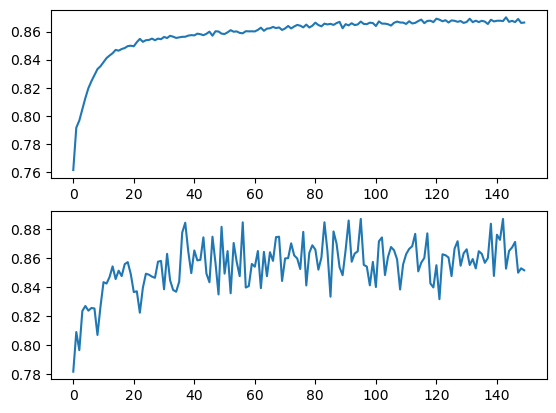

In [64]:
plt.subplot(2,1,1)
plt.plot(history.history['precision_5'])

plt.subplot(2,1,2)
plt.plot(history.history['val_precision_5'])

#### Save Model

In [67]:
model.save("log_reg_keras_source_drop.h5")